### import libraries

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### import data 

In [95]:
data=pd.read_csv("Classified Data")
data.head()

Unnamed: 0       WTT       PTI       EQW       SBI       LQE       QWG  \
0           0  0.913917  1.162073  0.567946  0.755464  0.780862  0.352608   
1           1  0.635632  1.003722  0.535342  0.825645  0.924109  0.648450   
2           2  0.721360  1.201493  0.921990  0.855595  1.526629  0.720781   
3           3  1.234204  1.386726  0.653046  0.825624  1.142504  0.875128   
4           4  1.279491  0.949750  0.627280  0.668976  1.232537  0.703727   

        FDJ       PJF       HQE       NXJ  TARGET CLASS  
0  0.759697  0.643798  0.879422  1.231409             1  
1  0.675334  1.013546  0.621552  1.492702             0  
2  1.626351  1.154483  0.957877  1.285597             0  
3  1.409708  1.380003  1.522692  1.153093             1  
4  1.115596  0.646691  1.463812  1.419167             1

In [96]:
x=data.drop(["Unnamed: 0","TARGET CLASS"],axis=1)
x.head()

WTT       PTI       EQW       SBI       LQE       QWG       FDJ  \
0  0.913917  1.162073  0.567946  0.755464  0.780862  0.352608  0.759697   
1  0.635632  1.003722  0.535342  0.825645  0.924109  0.648450  0.675334   
2  0.721360  1.201493  0.921990  0.855595  1.526629  0.720781  1.626351   
3  1.234204  1.386726  0.653046  0.825624  1.142504  0.875128  1.409708   
4  1.279491  0.949750  0.627280  0.668976  1.232537  0.703727  1.115596   

        PJF       HQE       NXJ  
0  0.643798  0.879422  1.231409  
1  1.013546  0.621552  1.492702  
2  1.154483  0.957877  1.285597  
3  1.380003  1.522692  1.153093  
4  0.646691  1.463812  1.419167

### standardisation

In [97]:

from sklearn.preprocessing import StandardScaler

In [98]:

scaler = StandardScaler()
# scaled = scaler.fit_transform(data[:, :-1])  # Excluding the last column
# scaled_data = pd.DataFrame(scaled, columns=range(data.shape[1] - 1))
# scaled_data
x=scaler.fit_transform(x)


/Users/sharafunneesapp/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


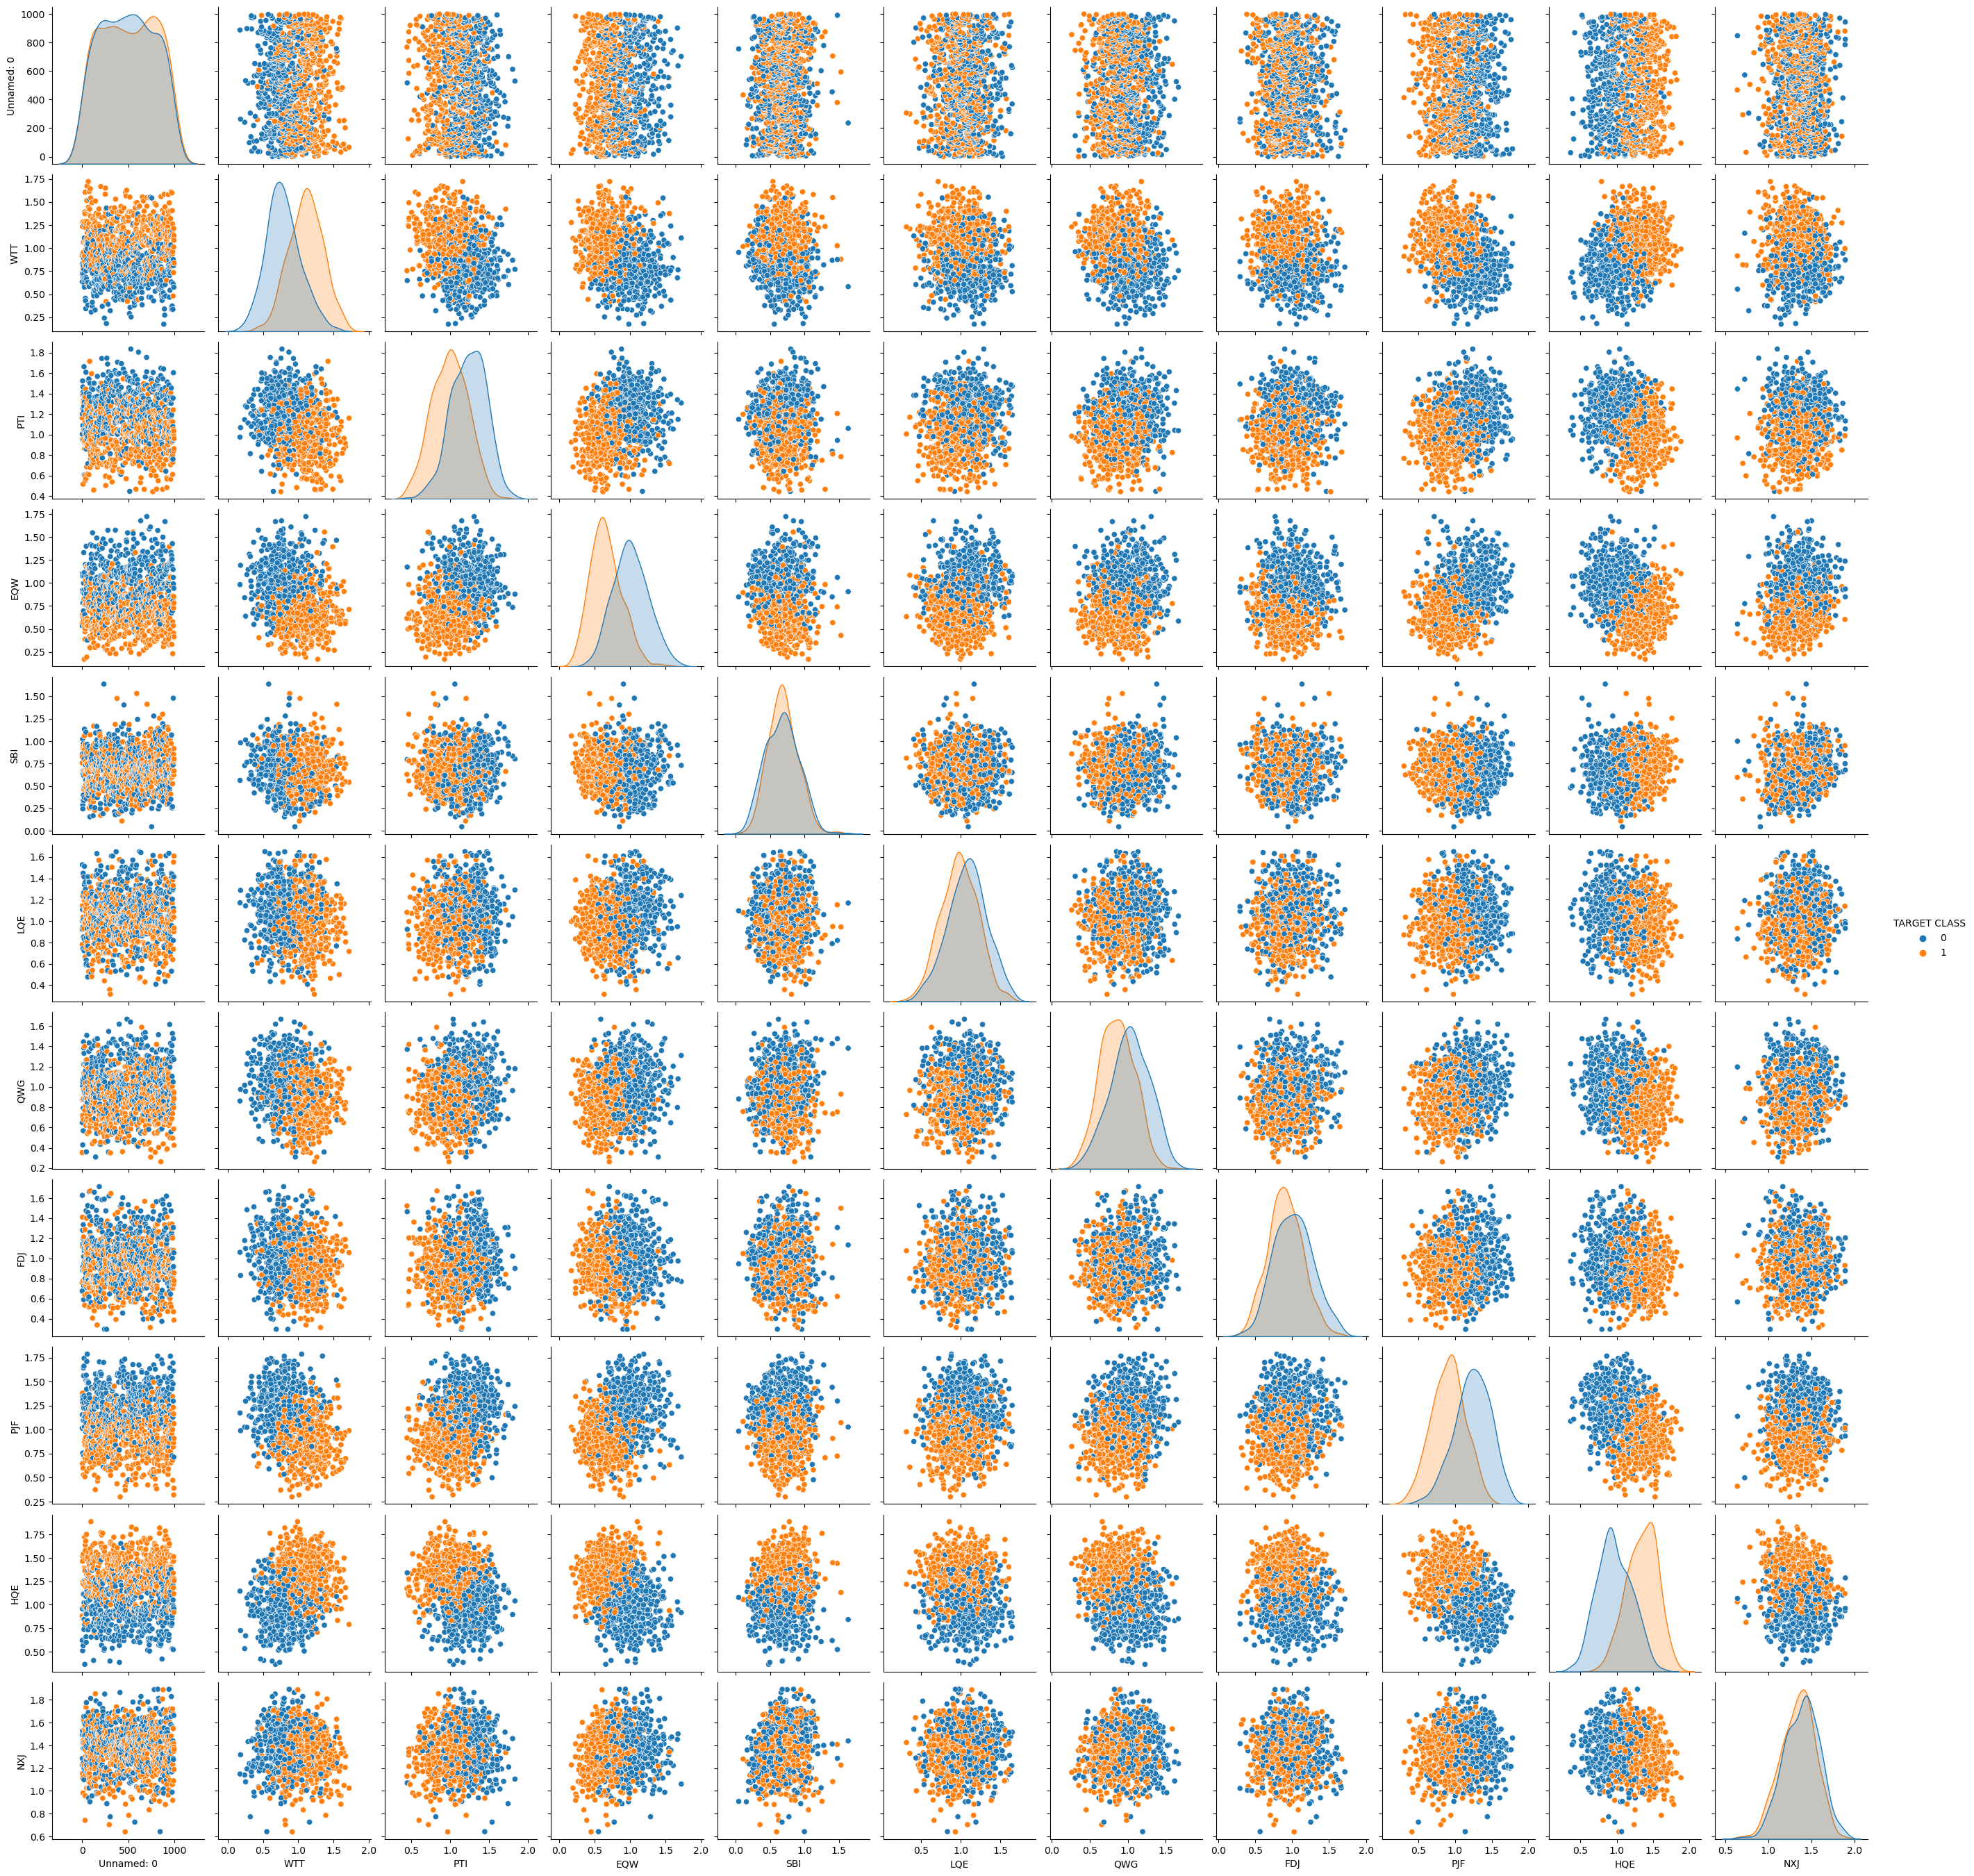

In [99]:
sns.pairplot(data,hue="TARGET CLASS")

### test splitting

In [100]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,data["TARGET CLASS"],test_size=0.30)

### using knn

In [101]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(xtrain,ytrain)
pred=knn.predict(xtest)


### prediction and evaluation

In [102]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [103]:
print(confusion_matrix(ytest,pred))

[[141  21]
 [  7 131]]


In [104]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91       162
           1       0.86      0.95      0.90       138

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



### choosing a k value

In [105]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    pred=knn.predict(xtest)
    error_rate.append(np.mean(pred!=ytest))
    


Text(0, 0.5, 'error rate')

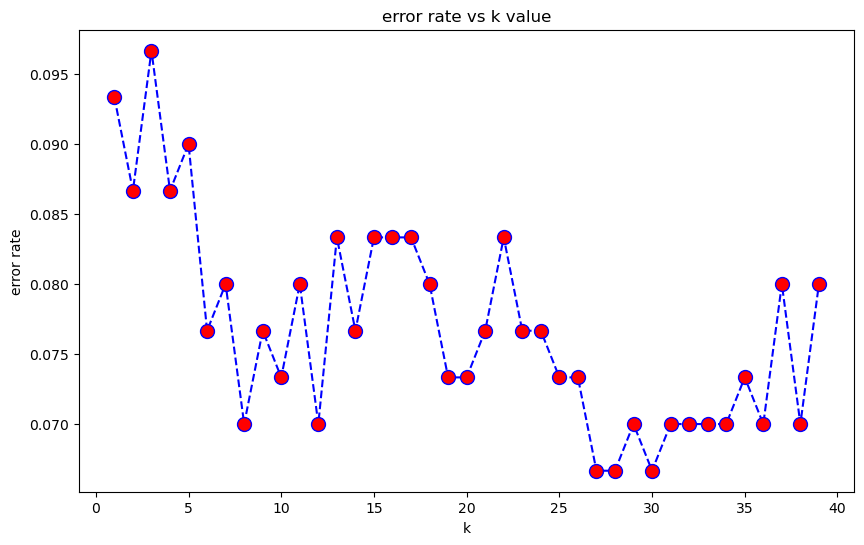

In [106]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color="blue",linestyle="dashed",marker='o',markerfacecolor="red",markersize=10)
plt.title("error rate vs k value")
plt.xlabel("k")
plt.ylabel("error rate")

In [107]:
#retrain the model
knn=KNeighborsClassifier(n_neighbors=27)
knn.fit(xtrain,ytrain)
pred=knn.predict(xtest)
print(confusion_matrix(ytest,pred))

[[144  18]
 [  2 136]]
